# Telecom Churn Prediction

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv
df_churn=pd.read_csv('churn_data.csv')
df_customer=pd.read_csv('customer_data.csv')
df_internet=pd.read_csv('internet_data.csv')

In [3]:
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
#Merging Churn data and customer data with primary key customerID
df=pd.merge(df_churn, df_customer, how='inner', on='customerID')
df=pd.merge(df, df_internet, how='inner', on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
#Visualize null values if any
import klib
klib.missingval_plot(df)

No missing values found in the dataset.


There are no missing values in the data set.

In [11]:
df_columns=df.columns
df_columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [12]:
df_binary_columns=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def yes_no(x):
    return x.map({'Yes': 1, 'No': 0})

df[df_binary_columns]= df[df_binary_columns].apply(yes_no)
df.gender=df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### One hot encoding for categorical variables with more than one categories

In [13]:
#one_hot_list=['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity','OnlineBackup', 
#               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# for i in one_hot_list:
#     print(i)
#     print(df[i].value_counts())
#     print('--------------------------------------------------------------')

In [14]:
#creating dummies for the above columns:
# dummy1=pd.get_dummies(df[one_hot_list],drop_first=True)
# df=df.drop(one_hot_list, axis=1)

# df=pd.concat([df, dummy1], axis=1)
# df.head()

In [15]:
# df.info()

The variable TotalCharges is of object type. Changing it's data type:

In [16]:
# df.TotalCharges=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [17]:
#Dropping customerID
# df=df.drop('customerID', axis=1)

In [18]:
# df.gender.value_counts()

In [19]:
#Checking for null values again since TotalCharges changed to numeric
# df.isnull().sum()

In [20]:
# df=df[~df.TotalCharges.isnull()==True]

In [21]:
#Checking for outliers:
# df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe(percentiles=[0.0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

#### There are no outliers in the data

### Data Pre-processing for training the model

In [22]:
# df.columns

In [23]:
# y=df.pop('Churn')
# X=df
# print(y.head())
# X.head()

In [24]:
# from sklearn.model_selection import train_test_split
# print(X.shape)
# print(y.shape)
# X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=100, train_size=0.7)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

### Feature scaling

In [25]:
#The columns 'tenure', 'MonthlyCharges', 'TotalCharges' needs to be scaled.
#Checking whether the data of these variables follows a Gaussian distribution or not.

# plt.figure(figsize=(16,10))
# plt.subplot(1,3,1)
# sns.distplot(df.tenure)
# plt.subplot(1,3,2)
# sns.distplot(df.MonthlyCharges)
# plt.subplot(1,3,3)
# sns.distplot(df.TotalCharges)
# plt.show()

In [26]:
#If the data doesn't follow Gaussian distribution MinMaxScaler(Normalization) must be used. But in the course StandardScaler is used.
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

# X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
# X_train.head()

In [27]:
# y_train.head()

In [28]:
#Checking if there is a major bias in Churn in test data
# churn_rate= (y_train.sum())/(y_train.shape[0])
# churn_rate

In [29]:
#Churn rate is 26%

In [30]:
#Checking correlation.
# plt.figure(figsize=(22,16))
# sns.heatmap(df.corr(), annot=True)
# plt.show()

#### As it is visible that while doing one-hot coding, variables with No internet service were given preference over yes or no.Hence accomplishing one-hot cencoding again after commenting from the above part.

In [31]:
one_hot_encoding1=['Contract', 'PaymentMethod', 'InternetService']

for i in one_hot_encoding1:
    print(i)
    print(df[i].value_counts())
    print('--------------------------')

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
--------------------------
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
--------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------


In [32]:
dummy1=pd.get_dummies(df[one_hot_encoding1], drop_first=True)
df=pd.concat([df, dummy1], axis=1)
#df=df.drop(one_hot_encoding1, axis=1)
df.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,No,No,No,0,0,0,1,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,No,No,No,1,0,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,No,No,No,0,0,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,Yes,No,No,1,0,0,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,No,No,No,0,0,0,1,0,1,0


In [33]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)

In [34]:
df = df.drop(['Contract','PaymentMethod','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [35]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   gender                                 7043 non-null   int64  
 8   SeniorCitizen                          7043 non-null   int64  
 9   Partner                                7043 non-null   int64  
 10  Dependents                             7043 non-null   int64  
 11  Cont

In [37]:
df.TotalCharges=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [38]:
#Dropping customerID
df=df.drop('customerID', axis=1)

In [39]:
#Checking for null values again since TotalCharges changed to numeric
df.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                

In [40]:
df=df[~df.TotalCharges.isnull()==True]

In [41]:
#Checking for outliers:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe(percentiles=[0.0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
0%,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000


#### There are no outliers in the data

### Data Pre-processing for training the model

In [42]:
df.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [43]:
y=df.pop('Churn')
X=df
print(y.head())
X.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,1,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=100, train_size=0.7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7032, 30)
(7032,)
(4922, 30)
(4922,)
(2110, 30)
(2110,)


### Feature scaling

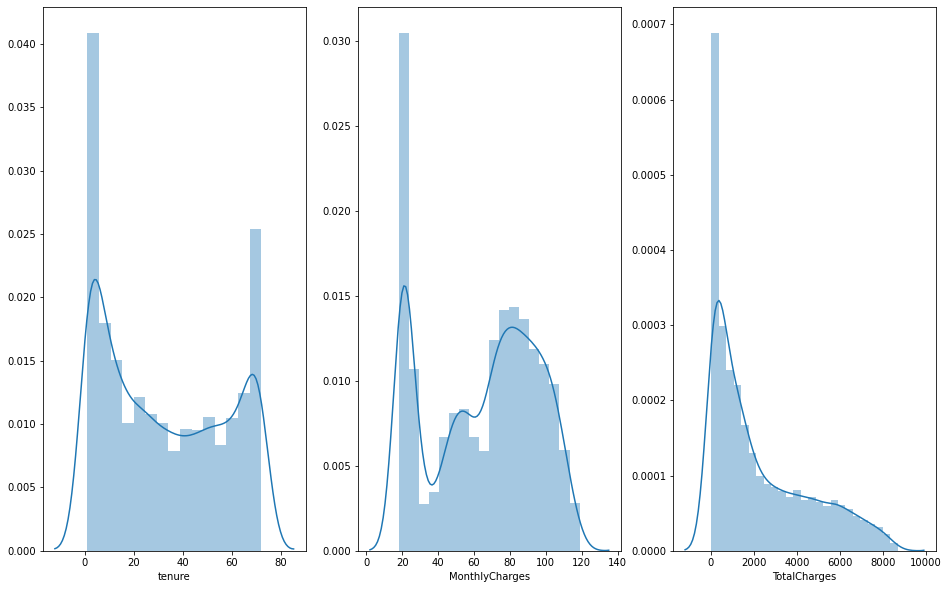

In [45]:
#The columns 'tenure', 'MonthlyCharges', 'TotalCharges' needs to be scaled.
#Checking whether the data of these variables follows a Gaussian distribution or not.

plt.figure(figsize=(16,10))
plt.subplot(1,3,1)
sns.distplot(df.tenure)
plt.subplot(1,3,2)
sns.distplot(df.MonthlyCharges)
plt.subplot(1,3,3)
sns.distplot(df.TotalCharges)
plt.show()

In [46]:
#If the data doesn't follow Gaussian distribution MinMaxScaler(Normalization) must be used. But in the course StandardScaler is used.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1


In [47]:
y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [48]:
#Checking if there is a major bias in Churn in test data
churn_rate= (y_train.sum())/(y_train.shape[0])
churn_rate

0.26147907354733846

Churn rate is 26%

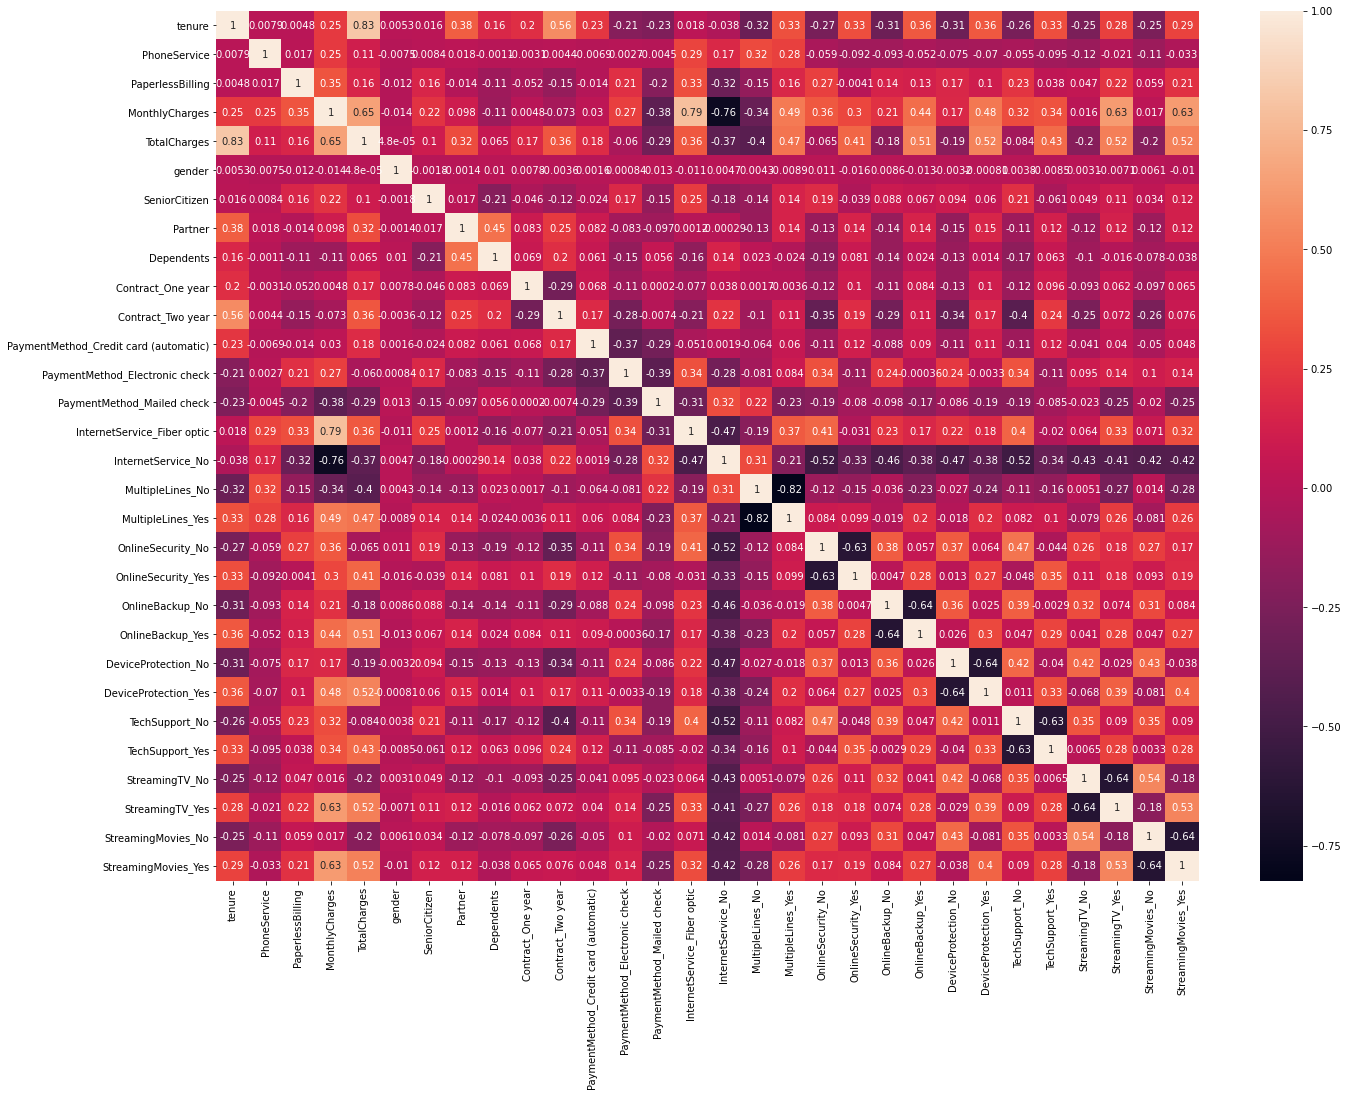

In [49]:
#Checking correlation.
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [50]:
#Dropping high corelated values.

X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

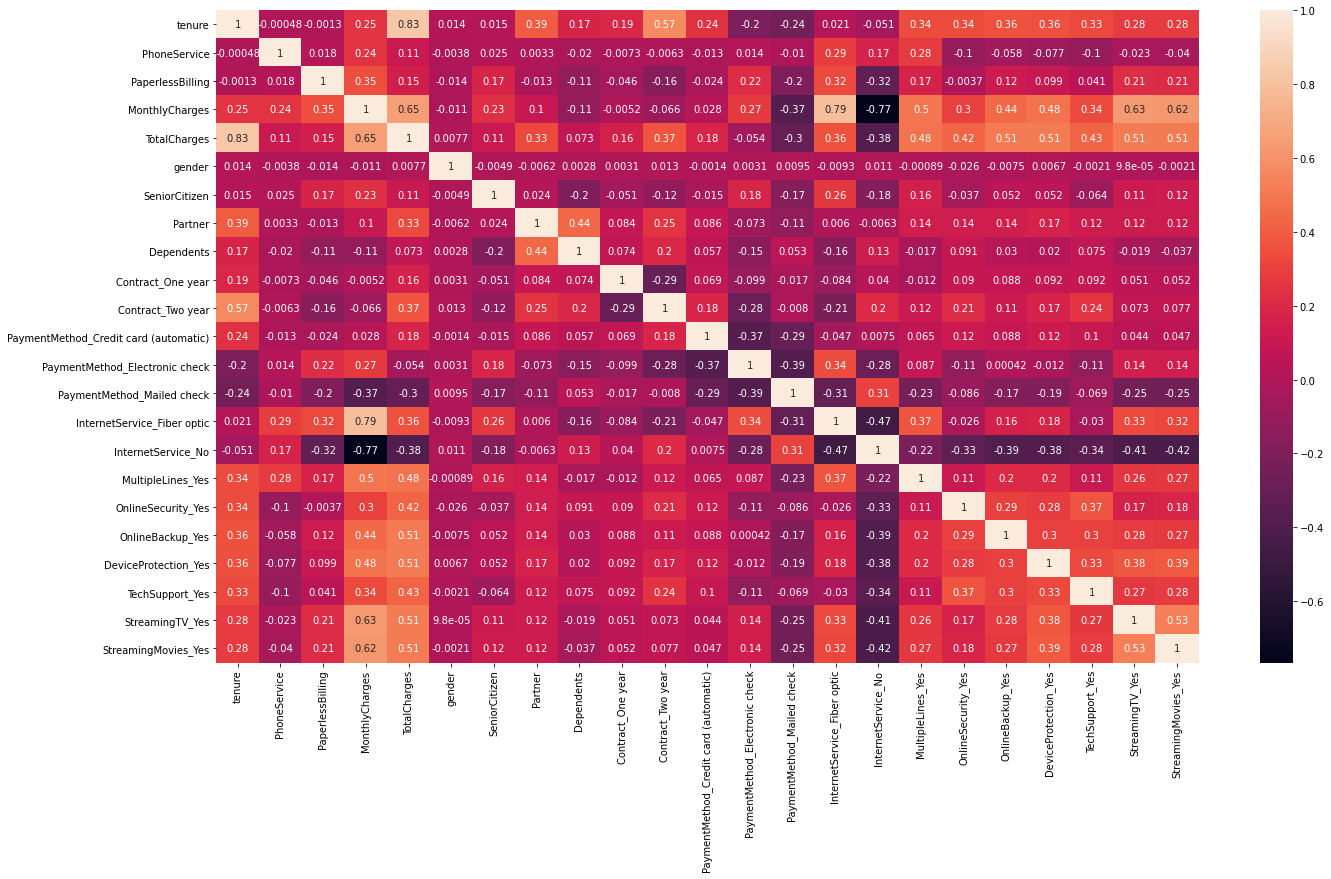

In [51]:
plt.figure(figsize=(22,12))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [52]:
y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [53]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,1,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,0,1,0,...,0,1,0,0,0,0,1,1,1,1


### Building the model

#### 1st Model

In [54]:
import statsmodels.api as sm
lr_model1=sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
lr_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 02 Feb 2021   Deviance:                       4009.4
Time:                        07:21:46   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
gender                                   -0.0346      0.078     -0.442      0.658      -0.188       0.119
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

#### Instead of doing complete manual feature selection, we can take help of RFE

In [55]:
from sklearn.linear_model import LogisticRegression
lr_model2=LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE
rfe=RFE(lr_model2, 15)
rfe=rfe.fit(X_train, y_train)

In [57]:
rfe.support_

array([ True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender', False, 8),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [59]:
cols=X_train.columns[rfe.support_]
cols

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'gender', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

### Model Assessment using statsmodel.api

In [61]:
X_train=X_train[cols]
lr_model3=sm.GLM(y_train, (sm.add_constant(X_train[cols])), family=sm.families.Binomial()).fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Tue, 02 Feb 2021   Deviance:                       4022.2
Time:                        07:21:47   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

#### Looking at the p-values it seems here all the variables are significant i.e; <0.05 atleast

In [62]:
X_train_sm=sm.add_constant(X_train[cols])
y_pred=lr_model3.predict(X_train_sm)
y_pred.head(10)

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [63]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values, 'Churn_Prob': y_pred.values},index=None)
y_train_pred_final.head(10)

,Churn,Churn_Prob
0,0,0.192642
1,0,0.275624
2,1,0.599507
3,1,0.513571
4,1,0.648233
5,0,0.414846
6,0,0.431184
7,1,0.801788
8,0,0.228194
9,1,0.504575


In [64]:
y_train_pred_final['CustId']=y_train.index
y_train_pred_final

,Churn,Churn_Prob,CustId
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784
...,...,...,...
4917,0,0.015336,79
4918,0,0.126458,3934
4919,0,0.039247,5964
4920,0,0.129142,6947


In [65]:
#This code I couldn't crack. So remember this simple code.
y_train_pred_final['prediction']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>=0.5 else 0)
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustId,prediction
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1
5,0,0.414846,3874,0
6,0,0.431184,5387,0
7,1,0.801788,6623,1
8,0,0.228194,4465,0
9,1,0.504575,5364,1


### Confusion Matrix and Accuracy

In [66]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['prediction'])
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [67]:
#### Predicted     not_churn    churn
#### Actual
#### not_churn        3270      365
#### churn            579       708  

In [68]:
accuracy=metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['prediction'])
accuracy

0.8102397399431126

#### Validating Multicollinearity using Variance Inflation Factor

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()

In [70]:
VIF['Features']=cols
VIF['vif']=[variance_inflation_factor(X_train[cols].values, i) for i in range (X_train[cols].shape[1])]
VIF=VIF.sort_values(by='vif', ascending=False)

In [71]:
VIF

,Features,vif
2,MonthlyCharges,14.848268
3,TotalCharges,10.418581
0,tenure,7.378458
9,InternetService_Fiber optic,5.607472
10,InternetService_No,5.271052
6,Contract_Two year,3.144732
14,StreamingMovies_Yes,2.792727
13,StreamingTV_Yes,2.791697
1,PaperlessBilling,2.756535
11,MultipleLines_Yes,2.375806


In [72]:
#VIF of Monthly Charges is very high. Hence dropping that variable
X_train=X_train.drop('MonthlyCharges',axis=1)

In [73]:
#Training the model again
X_train_sm2=sm.add_constant(X_train)
lr_model4=sm.GLM(y_train, X_train_sm2).fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13799
Method:                          IRLS   Log-Likelihood:                -2102.4
Date:                Tue, 02 Feb 2021   Deviance:                       677.14
Time:                        07:21:47   Pearson chi2:                     677.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1844      0.018     10.080      0.000       0.149       0.220
tenure                                   -0.0394      0.014     -2.823      0.005      -0.067      -0.012
PaperlessBilling                          0.0446      0.012      3.774      0.000       0.021       0.068
TotalCharges                             -0.1348      0.016     -8.598      0.000      -0.166      -0.104
SeniorCitizen                             0.0832      0.015      5.473      0.000       0.053       0.113
Contract_One year                        -0.1105      0.016     -6.789      0.000      -0.142      -0.079
Contract_Two year                        -0.0678      0.020     -3.394      0.001      -0.107      -0.029
PaymentMethod_Credit card (automatic)    -0.0501      0.014     -3.611      0.000      -0.077      -0.023
PaymentMethod_Mailed check               -0.0552      0.015     -3.723      0.000      -0.084      -0.026
InternetService_Fiber optic               0.1940      0.016     12.510      0.000       0.164       0.224
InternetService_No                       -0.1534      0.018     -8.294      0.000      -0.190      -0.117
MultipleLines_Yes                         0.0481      0.013      3.787      0.000       0.023       0.073
TechSupport_Yes                          -0.0573      0.014     -3.991      0.000      -0.085      -0.029
StreamingTV_Yes                           0.0679      0.014      4.814      0.000       0.040       0.096
StreamingMovies_Yes                       0.0508      0.014      3.602      0.000       0.023       0.078
=========================================================================================================
"""

#### The p-values of the features are looking good here

In [74]:
y_pred=lr_model4.predict(X_train_sm2)

In [75]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values, 'Churn_Prob': y_pred.values},index=None)
y_train_pred_final.head(10)

,Churn,Churn_Prob
0,0,0.313665
1,0,0.350903
2,1,0.605025
3,1,0.594858
4,1,0.642959
5,0,0.378988
6,0,0.302209
7,1,0.736726
8,0,0.285406
9,1,0.536431


In [76]:
y_train_pred_final['CustId']=y_train.index
y_train_pred_final

,Churn,Churn_Prob,CustId
0,0,0.313665,879
1,0,0.350903,5790
2,1,0.605025,6498
3,1,0.594858,880
4,1,0.642959,2784
...,...,...,...
4917,0,0.007098,79
4918,0,0.109456,3934
4919,0,0.057154,5964
4920,0,0.106026,6947


In [77]:
y_train_pred_final['prediction']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>=0.5 else 0)
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustId,prediction
0,0,0.313665,879,0
1,0,0.350903,5790,0
2,1,0.605025,6498,1
3,1,0.594858,880,1
4,1,0.642959,2784,1
5,0,0.378988,3874,0
6,0,0.302209,5387,0
7,1,0.736726,6623,1
8,0,0.285406,4465,0
9,1,0.536431,5364,1


In [78]:
accuracy=metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['prediction'])
accuracy

0.8033319788703779

#### Not much difference in the accuracy metric

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()

In [80]:
cols = cols.drop('MonthlyCharges', 1)
VIF['Features']=cols
VIF['vif']=[variance_inflation_factor(X_train[cols].values, i) for i in range (X_train[cols].shape[1])]
VIF=VIF.sort_values(by='vif', ascending=False)

In [81]:
VIF

,Features,vif
2,TotalCharges,7.459381
0,tenure,6.898971
5,Contract_Two year,3.070035
8,InternetService_Fiber optic,2.959871
13,StreamingMovies_Yes,2.616502
12,StreamingTV_Yes,2.589761
1,PaperlessBilling,2.550472
9,InternetService_No,2.443707
10,MultipleLines_Yes,2.274276
11,TechSupport_Yes,1.949484


In [82]:
cols=cols.drop('TotalCharges',1)
cols

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [83]:
#VIF of Total Charges is very high. Hence dropping that variable
X_train=X_train.drop('TotalCharges',axis=1)

In [84]:
#Training the model again
X_train_sm3=sm.add_constant(X_train)
lr_model5=sm.GLM(y_train, X_train_sm3).fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14004
Method:                          IRLS   Log-Likelihood:                -2139.2
Date:                Tue, 02 Feb 2021   Deviance:                       687.34
Time:                        07:21:47   Pearson chi2:                     687.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2452      0.017     14.418      0.000       0.212       0.278
tenure                                   -0.1359      0.008    -16.261      0.000      -0.152      -0.120
PaperlessBilling                          0.0471      0.012      3.953      0.000       0.024       0.070
SeniorCitizen                             0.0846      0.015      5.525      0.000       0.055       0.115
Contract_One year                        -0.1172      0.016     -7.158      0.000      -0.149      -0.085
Contract_Two year                        -0.0623      0.020     -3.096      0.002      -0.102      -0.023
PaymentMethod_Credit card (automatic)    -0.0558      0.014     -4.000      0.000      -0.083      -0.028
PaymentMethod_Mailed check               -0.0741      0.015     -5.010      0.000      -0.103      -0.045
InternetService_Fiber optic               0.1359      0.014      9.665      0.000       0.108       0.163
InternetService_No                       -0.1122      0.018     -6.234      0.000      -0.147      -0.077
MultipleLines_Yes                         0.0259      0.013      2.066      0.039       0.001       0.050
TechSupport_Yes                          -0.0856      0.014     -6.081      0.000      -0.113      -0.058
StreamingTV_Yes                           0.0386      0.014      2.801      0.005       0.012       0.066
StreamingMovies_Yes                       0.0222      0.014      1.609      0.108      -0.005       0.049
=========================================================================================================
"""

#### The p-value of Streaming_Movies_Yes >0.05 makes it an insignificant variale. Let's investigate VIF

In [85]:
y_pred=lr_model5.predict(X_train_sm3)

In [86]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values, 'Churn_Prob': y_pred.values},index=None)
y_train_pred_final.head(10)

,Churn,Churn_Prob
0,0,0.315451
1,0,0.311569
2,1,0.602935
3,1,0.528297
4,1,0.561577
5,0,0.422674
6,0,0.317770
7,1,0.713471
8,0,0.244292
9,1,0.500903


In [87]:
y_train_pred_final['CustId']=y_train.index
y_train_pred_final

,Churn,Churn_Prob,CustId
0,0,0.315451,879
1,0,0.311569,5790
2,1,0.602935,6498
3,1,0.528297,880
4,1,0.561577,2784
...,...,...,...
4917,0,-0.036309,79
4918,0,0.093237,3934
4919,0,0.068172,5964
4920,0,0.145008,6947


In [88]:
y_train_pred_final['prediction']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>=0.5 else 0)
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustId,prediction
0,0,0.315451,879,0
1,0,0.311569,5790,0
2,1,0.602935,6498,1
3,1,0.528297,880,1
4,1,0.561577,2784,1
5,0,0.422674,3874,0
6,0,0.317770,5387,0
7,1,0.713471,6623,1
8,0,0.244292,4465,0
9,1,0.500903,5364,1


In [89]:
accuracy=metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['prediction'])
accuracy

0.8045509955302722

#### Not much difference in the accuracy metric

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()

In [91]:
VIF['Features']=cols
VIF['vif']=[variance_inflation_factor(X_train[cols].values, i) for i in range (X_train[cols].shape[1])]
VIF=VIF.sort_values(by='vif', ascending=False)

In [92]:
VIF

,Features,vif
4,Contract_Two year,2.975811
7,InternetService_Fiber optic,2.668243
12,StreamingMovies_Yes,2.542743
11,StreamingTV_Yes,2.509547
1,PaperlessBilling,2.454934
9,MultipleLines_Yes,2.241567
0,tenure,2.037651
8,InternetService_No,2.027428
10,TechSupport_Yes,1.922333
3,Contract_One year,1.775493


In [93]:
cols

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

#### The VIFs look good. None of the variables are collinear now. Since the variable StreamingMovies_Yes is significant in terms of Churning condition, let's not drop just on the basis of p-value.

#### Hence Till now, the features that seem significant for the model are 'tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes' with an accuracy of 0.8045509955302722